In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import japanize_matplotlib
import math


In [23]:
df = pd.read_csv(
    f"data.csv",
    header=0,
    names=("time", "break", "turn", "noize")
)

df["time"] = (df["time"] - df["time"][0]) / 1000 - 5


In [24]:
# グラフを描画する
def plot(
    df,
    heads=[],
    title=None,
    xlabel=None,
    ylabel=None,
    figsize=(10, 3),
    xlim=(0, 0),
    ylim=(0, 0),
    yticks=[],
    grid=True,
    showLegend=False
):
    fig = plt.figure(figsize=figsize)

    if title:
        plt.title(title)
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    if yticks:
        plt.yticks(yticks)
    if grid:
        plt.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5)

    if xlim[0] < xlim[1]:
        plt.xlim(xlim[0], xlim[1])
    if ylim[0] < ylim[1]:
        plt.ylim(ylim[0], ylim[1])

    for head in heads:
        plt.plot(df[head[0]], df[head[1]], label=head[1],color='blue')

        tmp_df = df[[head[0], head[1]]]
        past = 0
        for d in tmp_df.itertuples():
            if d[2] >= 0.93:
                plt.axvspan(
                    past,
                    d[1]+0.4,
                    color="r",
                    alpha=0.5,
                    linewidth=0
                )
            past = d[1]+0.4

    if showLegend:
        plt.legend()

    plt.show()


In [25]:
def avg_filter(df, n):
    n = n - 1
    tmp_df = []
    for i in range(len(df) - n):
        tmp_df.append(df[i:i + n].mean())

    return pd.DataFrame(tmp_df)


In [26]:
df["avg_fil"] = avg_filter(df["break"], 4)

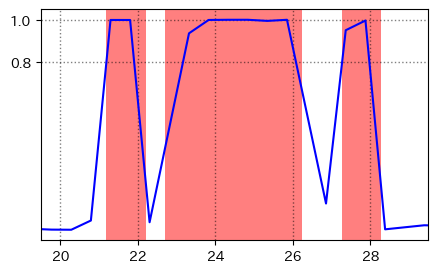

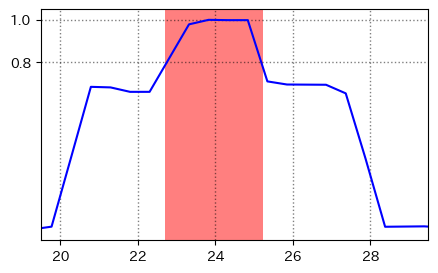

In [27]:
plot(
    df,
    heads=[
        ["time", "break"],
    ],
    title=None,
    xlim=(19.5, 29.5),
    yticks=[0.8,1],
    grid=True,
    figsize=(5, 3),
)

plot(
    df,
    heads=[
        ["time", "avg_fil"],
    ],
    title=None,
    xlim=(19.5, 29.5),
    yticks=[0.8,1],
    grid=True,
    figsize=(5, 3),
)